# DSND Project - Communicating with Stakeholders

## Business understanding

This notebook is analyses of Airbnb data for seattle city. This analysis will be based on the CRISP-DM process.

The analysis is used to answer the following questions about the data:
- What are the top contributing features for pricing?
- How are Airbnb prices distributed across top 3 features?
- What are the most expensive zipcodes in Seattle?


## Data understanding

### Setup - Load the required python libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Get the data and verify it

In [2]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

#### Verify if data is loaded properly

In [3]:
calendar.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,04/01/16,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,04/01/16,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,04/01/16,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,04/01/16,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,04/01/16,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Do basic analysis of data

#### The most useful data for our analysis is available in the listings file and hence our focus from now on, will be on analysing the data within this dataframe

In [6]:
listings.shape

(3818, 92)

We have 3818 listings (rows) and each listing is made up of 92 features (columns)

#### Now lets look at the features of each row

In [7]:
listings.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

#### Analysing the features from an Airbnb host perspective, i think i would use a sub-set of these features to price and list my property. 
#### Similarly, analysing the features from an Airbnb customer perspective, i identified another sub-set of these features which would help me decide if i would select and stay in a given property. 
#### I combined both sub-sets to come up with a list of features that would be useful in answering the questions listed above.

#### The features that are most relevant for our analysis are:
- host_response_time
- host_response_rate
- zipcode
- property_type
- room_type
- accommodates
- bathrooms
- bedrooms
- beds
- price
- minimum_nights
- number_of_reviews
- review_scores_rating
- reviews_per_month

## Data wrangling

### To speed up processing, lets remove unwanted features from the data

In [8]:
needed_features = [ 'id', 'host_response_time' , 'host_response_rate' , 'zipcode' , 'property_type',
                   'room_type' , 'accommodates' , 'bathrooms' , 'bedrooms' , 'beds' , 'price' , 
                   'minimum_nights' , 'number_of_reviews' , 'review_scores_rating' , 'reviews_per_month']

new_listings = listings[needed_features].copy()
new_listings.shape

(3818, 15)

In [9]:
new_listings.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
id                      3818 non-null int64
host_response_time      3295 non-null object
host_response_rate      3295 non-null object
zipcode                 3811 non-null object
property_type           3817 non-null object
room_type               3818 non-null object
accommodates            3818 non-null int64
bathrooms               3802 non-null float64
bedrooms                3812 non-null float64
beds                    3817 non-null float64
price                   3818 non-null object
minimum_nights          3818 non-null int64
number_of_reviews       3818 non-null int64
review_scores_rating    3171 non-null float64
reviews_per_month       3191 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 447.5+ KB


### Now let's wrangle each feature to ensure that they contain valid data and in a format useful for modeling

#### host_response_time
host_response_time is a categorical feature with text values such as within an hour, within a few hours, within a day and a few days or more. This feature also contains missing values. We will conver this field into numeric values as below

0 - within an hour

1 - within a few hours

2 - within a day 

3 - a few days or more


In [10]:
new_listings.host_response_time

0       within a few hours
1           within an hour
2       within a few hours
3                      NaN
4           within an hour
5                      NaN
6           within an hour
7           within an hour
8                      NaN
9           within an hour
10      within a few hours
11      within a few hours
12          within an hour
13          within an hour
14          within an hour
15      within a few hours
16          within an hour
17          within an hour
18                     NaN
19                     NaN
20      within a few hours
21          within an hour
22            within a day
23                     NaN
24                     NaN
25      within a few hours
26      within a few hours
27          within an hour
28          within an hour
29          within an hour
               ...        
3788        within an hour
3789    within a few hours
3790        within an hour
3791    within a few hours
3792        within an hour
3793        within an hour
3

In [11]:
new_listings.host_response_time.unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [12]:
new_listings.replace({'within an hour': 0,
                         'within a few hours': 1,
                         'within a day': 2,
                         'a few days or more': 3}, inplace=True)
new_listings.host_response_time.unique()

array([ 1.,  0., nan,  2.,  3.])

In [13]:
new_listings.host_response_time

0       1.0
1       0.0
2       1.0
3       NaN
4       0.0
5       NaN
6       0.0
7       0.0
8       NaN
9       0.0
10      1.0
11      1.0
12      0.0
13      0.0
14      0.0
15      1.0
16      0.0
17      0.0
18      NaN
19      NaN
20      1.0
21      0.0
22      2.0
23      NaN
24      NaN
25      1.0
26      1.0
27      0.0
28      0.0
29      0.0
       ... 
3788    0.0
3789    1.0
3790    0.0
3791    1.0
3792    0.0
3793    0.0
3794    1.0
3795    0.0
3796    0.0
3797    0.0
3798    0.0
3799    3.0
3800    NaN
3801    1.0
3802    NaN
3803    1.0
3804    1.0
3805    0.0
3806    0.0
3807    2.0
3808    1.0
3809    2.0
3810    0.0
3811    1.0
3812    0.0
3813    1.0
3814    0.0
3815    NaN
3816    0.0
3817    2.0
Name: host_response_time, Length: 3818, dtype: float64

#### Since host_response_time is a categorical feature, it makes sence to replace missing values with Mode of existing data i.e most frequently occuring data

In [14]:
new_listings['host_response_time'].fillna(new_listings['host_response_time'].mode()[0], inplace=True)

In [15]:
new_listings.host_response_time

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      1.0
11      1.0
12      0.0
13      0.0
14      0.0
15      1.0
16      0.0
17      0.0
18      0.0
19      0.0
20      1.0
21      0.0
22      2.0
23      0.0
24      0.0
25      1.0
26      1.0
27      0.0
28      0.0
29      0.0
       ... 
3788    0.0
3789    1.0
3790    0.0
3791    1.0
3792    0.0
3793    0.0
3794    1.0
3795    0.0
3796    0.0
3797    0.0
3798    0.0
3799    3.0
3800    0.0
3801    1.0
3802    0.0
3803    1.0
3804    1.0
3805    0.0
3806    0.0
3807    2.0
3808    1.0
3809    2.0
3810    0.0
3811    1.0
3812    0.0
3813    1.0
3814    0.0
3815    0.0
3816    0.0
3817    2.0
Name: host_response_time, Length: 3818, dtype: float64

#### host_response_rate
host_response_rate is a percentage value and contains many missing values. We'll replace missing values with Mean value

In [16]:
new_listings.head()

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,241032,1.0,96%,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,1,207,95.0,4.07
1,953595,0.0,98%,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,2,43,96.0,1.48
2,3308979,1.0,67%,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,4,20,97.0,1.15
3,7421966,0.0,NaN,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,1,0,NaN,NaN
4,278830,0.0,100%,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,1,38,92.0,0.89


In [17]:
new_listings['host_response_rate'].fillna(0, inplace=True)
new_listings['host_response_rate'] = new_listings['host_response_rate'].astype(str)
new_listings['host_response_rate'] = new_listings['host_response_rate'].str.replace(r'%', '')
new_listings['host_response_rate'] = new_listings['host_response_rate'].astype(int)
new_listings['host_response_rate']=new_listings['host_response_rate'].mask(new_listings['host_response_rate']==0).fillna(new_listings['host_response_rate'].mean())
new_listings.host_response_rate.unique()

array([ 96.        ,  98.        ,  67.        ,  81.88894709,
       100.        ,  71.        ,  97.        ,  60.        ,
        50.        ,  31.        ,  90.        ,  70.        ,
        88.        ,  80.        ,  63.        ,  33.        ,
        99.        ,  75.        ,  83.        ,  94.        ,
        58.        ,  43.        ,  93.        ,  92.        ,
        40.        ,  57.        ,  89.        ,  95.        ,
        78.        ,  81.        ,  91.        ,  38.        ,
        86.        ,  30.        ,  56.        ,  76.        ,
        64.        ,  82.        ,  17.        ,  87.        ,
        25.        ,  69.        ,  53.        ,  65.        ,
        68.        ,  55.        ])

In [18]:
new_listings.head()

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,241032,1.0,96.000000,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,1,207,95.0,4.07
1,953595,0.0,98.000000,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,2,43,96.0,1.48
2,3308979,1.0,67.000000,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,4,20,97.0,1.15
3,7421966,0.0,81.888947,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,1,0,NaN,NaN
4,278830,0.0,100.000000,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,1,38,92.0,0.89


#### Zipcodes
zipcode is a numerical value and contains some missing values. We'll drop those rows since it's not practical to assume a zip code for a listing. This impacts only 7 rows which would not make any big difference to overall analysis

In [19]:
new_listings = new_listings.dropna(subset=['zipcode'])

In [20]:
new_listings.zipcode.unique()

array(['98119', '98109', '98107', '98117', '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

#### Also one of the zipcode is wrongly input. We'll correct the value manully

In [21]:
new_listings['zipcode'] = new_listings['zipcode'].astype(str)
new_listings['zipcode'] = new_listings['zipcode'].str.replace(r'99\n', '')
new_listings.zipcode.unique()

array(['98119', '98109', '98107', '98117', '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '98121', '98102', '98199',
       '98104', '98134', '98136', '98126', '98146', '98116', '98177',
       '98118', '98108', '98133', '98106', '98178', '98125'], dtype=object)

#### property_type
property_type is a categorical feature with text values. We will conver this field into numeric values as below

0 - Apartment

1 - House

2 - Cabin

3 - Condominium

4 - Camper/RV

5 - Bungalow

6 - Townhouse

7 - Loft

8 - Boat

9 - Dorm

10 - Bed & Breakfast

11 - Yurt

12 - Chalet

13 - Tent

14 - Treehouse

15 - Other

In [22]:
new_listings[new_listings['property_type'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
2184,3335,1.0,88.0,98118,NaN,Entire home/apt,4,1.0,2.0,2.0,$120.00,2,0,NaN,NaN


#### Since there is only one row with missing info, we'll replace this data with 'other' category

In [23]:
new_listings['property_type'].fillna(15, inplace=True)

In [24]:
new_listings.property_type.unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Other', 'Dorm',
       'Bed & Breakfast', 'Treehouse', 'Yurt', 'Chalet', 'Tent', 15],
      dtype=object)

In [25]:
new_listings.replace({  'Apartment': 0,
                        'House':1,
                        'Cabin':2,
                        'Condominium':3,
                        'Camper/RV':4,
                        'Bungalow':5,
                        'Townhouse':6,
                        'Loft':7,
                        'Boat':8,
                        'Dorm':9,
                        'Bed & Breakfast':10,
                        'Yurt':11,
                        'Chalet':12,
                        'Tent':13,
                        'Treehouse':14,
                        'Other':15
                     }, inplace=True)
new_listings.property_type.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 15,  9, 10, 14, 11, 12, 13])

#### room_type
room_type is a categorical feature with text values. We will conver this field into numeric values as below

0 - Entire home/apt

1 - Entire home/apt

2 - Shared room

In [26]:
new_listings[new_listings['room_type'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


#### There are no missing values in this feature

In [27]:
new_listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [28]:
new_listings.replace({  'Entire home/apt': 0,
                        'Private room':1,
                        'Shared room':2,
                     }, inplace=True)
new_listings.room_type.unique()

array([0, 1, 2])

#### accommodates
Accommodates is already a numeric column with data in correct format

In [29]:
new_listings[new_listings['accommodates'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


#### There are no missing values in this feature

In [30]:
new_listings.accommodates.unique()

array([ 4, 11,  3,  6,  2,  5, 16, 10,  1,  8,  7, 12,  9, 15, 14])

#### bathrooms
The number of bathrooms in an Airbnb property in Seattle is rightly formated as float64 so their no need to wrangle them

In [31]:
new_listings[new_listings['bathrooms'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
1242,19611,1.0,94.000000,98121,0,0,4,NaN,1.0,2.0,$107.00,2,26,87.0,0.37
1314,59827,1.0,94.000000,98121,0,0,4,NaN,1.0,2.0,$135.00,2,13,87.0,0.21
1357,19623,1.0,94.000000,98121,0,0,6,NaN,2.0,3.0,$186.00,2,38,89.0,0.54
1378,224763,1.0,100.000000,98121,0,0,4,NaN,1.0,1.0,$149.00,1,27,93.0,0.56
1961,609252,0.0,100.000000,98117,1,1,4,NaN,1.0,NaN,$280.00,1,0,NaN,NaN
1975,716829,0.0,100.000000,98103,12,1,1,NaN,1.0,1.0,$62.00,1,1,71.0,0.03
2048,354453,0.0,100.000000,98103,1,0,4,NaN,2.0,4.0,$150.00,2,0,NaN,NaN
2096,143580,1.0,100.000000,98144,1,1,2,NaN,1.0,1.0,$75.00,2,238,94.0,4.31
2306,774659,2.0,100.000000,98118,1,0,3,NaN,1.0,2.0,$105.00,2,40,97.0,1.08
2408,10385,2.0,100.000000,98115,1,1,2,NaN,1.0,1.0,$60.00,2,74,94.0,0.97


#### Since it is dificult to assume a value for number of bathrooms, we'll use the mode of the column i.e most occuring number

In [32]:
new_listings['bathrooms'].fillna(new_listings['bathrooms'].mode()[0], inplace=True)

In [33]:
new_listings[new_listings['bathrooms'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


#### bedrooms
The number of bedrooms in an Airbnb property in Seattle is rightly formated as float64 so their no need to wrangle them

In [34]:
new_listings[new_listings['bedrooms'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
1429,1476298,1.0,86.0,98121,0,0,2,1.0,NaN,1.0,$80.00,1,170,94.0,5.82
1492,604600,2.0,87.0,98101,0,0,6,1.0,NaN,1.0,$200.00,1,1,100.0,0.06
1493,1251763,1.0,92.0,98101,15,0,4,1.0,NaN,2.0,$132.00,1,1,100.0,0.08
1853,17951,0.0,100.0,98136,0,0,2,1.0,NaN,1.0,$95.00,2,21,94.0,0.31
2619,948077,2.0,70.0,98102,1,0,2,1.0,NaN,1.0,$99.00,2,77,100.0,2.28
2915,3272374,3.0,40.0,98112,0,0,2,1.0,NaN,1.0,$75.00,1,20,89.0,1.06


#### Since it is dificult to assume a value for number of bedrooms, we'll use the mode of the column i.e most occuring number

In [35]:
new_listings['bedrooms'].fillna(new_listings['bedrooms'].mode()[0], inplace=True)

In [36]:
new_listings[new_listings['bedrooms'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


#### beds
The number of beds in an Airbnb property in Seattle is rightly formated as float64 so their no need to wrangle them

In [37]:
new_listings[new_listings['beds'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
1961,609252,0.0,100.0,98117,1,1,4,1.0,1.0,NaN,$280.00,1,0,NaN,NaN


#### Since it is dificult to assume a value for number of beds, we'll use the mode of the column i.e most occuring number


In [38]:
new_listings['beds'].fillna(new_listings['beds'].mode()[0], inplace=True)

In [39]:
new_listings[new_listings['beds'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


#### price
Price column values are strings. We need to convert them to integers. Before we can do that, we need to remove the '$' sign from tghe price dsta

In [40]:
new_listings[new_listings['price'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [41]:
new_listings.price

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
5       $120.00
6        $80.00
7        $60.00
8        $90.00
9       $150.00
10       $95.00
11       $99.00
12      $245.00
13      $165.00
14      $461.00
15      $109.00
16       $66.00
17       $99.00
18      $200.00
19      $700.00
20      $110.00
21       $99.00
22      $450.00
23       $75.00
24      $600.00
25      $450.00
26      $150.00
27       $45.00
28      $300.00
29       $80.00
         ...   
3788    $115.00
3789     $60.00
3790    $175.00
3791     $85.00
3792    $109.00
3793    $109.00
3794    $107.00
3795    $200.00
3796     $85.00
3797     $70.00
3798     $77.00
3799     $65.00
3800    $185.00
3801    $108.00
3802    $200.00
3803    $250.00
3804    $125.00
3805    $100.00
3806    $160.00
3807    $109.00
3808    $175.00
3809    $120.00
3810    $154.00
3811     $65.00
3812     $95.00
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 381

In [42]:
def valid_prices(x):
    """Make the price colums valid by removing $ signs and converting to float"""
    x = float(x[1:].replace(',',''))
    return x

In [43]:
new_listings['price'] = new_listings['price'].apply(lambda x: valid_prices(x))

In [44]:
new_listings.price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
5       120.0
6        80.0
7        60.0
8        90.0
9       150.0
10       95.0
11       99.0
12      245.0
13      165.0
14      461.0
15      109.0
16       66.0
17       99.0
18      200.0
19      700.0
20      110.0
21       99.0
22      450.0
23       75.0
24      600.0
25      450.0
26      150.0
27       45.0
28      300.0
29       80.0
        ...  
3788    115.0
3789     60.0
3790    175.0
3791     85.0
3792    109.0
3793    109.0
3794    107.0
3795    200.0
3796     85.0
3797     70.0
3798     77.0
3799     65.0
3800    185.0
3801    108.0
3802    200.0
3803    250.0
3804    125.0
3805    100.0
3806    160.0
3807    109.0
3808    175.0
3809    120.0
3810    154.0
3811     65.0
3812     95.0
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3811, dtype: float64

#### minimum_nights
The minimum_nights feature of the listing is rightly formatted in float format and doesn't need any wrangling. 
##### The max value of this column seems a bit extreme at 1000 but for now i'll ignore this to see how it impacts the analysis.

In [45]:
new_listings[new_listings['minimum_nights'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [46]:
new_listings.minimum_nights.describe()

count    3811.000000
mean        2.371031
std        16.320811
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max      1000.000000
Name: minimum_nights, dtype: float64

#### number_of_reviews
This column too is rightly formatted for our needs and doesn't need any wrangling

In [47]:
new_listings[new_listings['number_of_reviews'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [48]:
new_listings.number_of_reviews.unique()

array([207,  43,  20,   0,  38,  17,  58, 173,   8,  32, 181,  13,   3,
        18,   1,  84,  45,   5,  11,  80,   6,   4,  68,  62,  19,   7,
         2,  71,   9,  41,  26,  44,  10,  77, 109,  52, 191,  65,  16,
        23,  75,  86, 151, 165,  48,  27,  88, 244,  40,  46,  14,  12,
        25,  35,  31, 113,  15,  56,  39,  79,  50,  28,  57,  64,  85,
       125, 131,  49, 111,  24,  81, 115,  72,  74, 107, 155,  98, 139,
        34,  36,  61,  55,  53,  59,  63,  21, 106,  30,  97,  54,  29,
        37,  33, 203, 182,  66,  70,  69, 100,  47,  83,  73, 118,  60,
       112,  42, 135,  22,  92,  78, 132,  93, 124, 146, 158, 270, 104,
        96,  99,  94, 136,  51, 164,  95, 141, 183, 188,  89, 108,  76,
        67, 121, 159, 123, 168, 170, 466, 474, 161, 265, 319, 114, 102,
       240, 154, 122, 105, 117, 133,  82, 209, 238, 137, 297, 144, 127,
       179, 138, 190,  90, 206, 166, 145, 148,  91, 147, 287, 101, 204,
       134, 320, 278, 189, 175, 279, 294, 263, 193, 255,  87, 11

#### review_scores_rating
This column too is rightly formatted for our needs and doesn't need any wrangling
But there are lots of rows with missing values for this feature. We'll replace the missing values with median of existing review ratings

In [49]:
new_listings[new_listings['review_scores_rating'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
3,7421966,0.0,81.888947,98119,0,0,3,1.0,0.0,2.0,100.0,1,0,NaN,NaN
18,7735464,0.0,81.888947,98119,0,1,2,2.0,1.0,1.0,200.0,1,0,NaN,NaN
23,10106055,0.0,81.888947,98119,1,1,2,1.0,1.0,1.0,75.0,1,0,NaN,NaN
26,9025039,1.0,100.000000,98119,1,0,5,1.0,2.0,3.0,150.0,1,0,NaN,NaN
46,9550869,2.0,90.000000,98119,5,0,10,3.0,4.0,4.0,349.0,1,0,NaN,NaN
51,9254900,0.0,100.000000,98119,0,0,2,1.0,0.0,1.0,100.0,1,0,NaN,NaN
53,10310373,0.0,81.888947,98119,0,1,3,1.0,1.0,1.0,20.0,1,0,NaN,NaN
54,9368342,1.0,100.000000,98119,6,0,2,1.5,1.0,1.0,150.0,4,0,NaN,NaN
58,4566393,0.0,81.888947,98119,1,0,4,2.5,3.0,3.0,400.0,2,0,NaN,NaN
64,8988281,0.0,67.000000,98119,1,0,4,1.0,2.0,2.0,175.0,1,0,NaN,NaN


In [50]:
new_listings['review_scores_rating'].fillna(new_listings['review_scores_rating'].median(), inplace=True)

In [51]:
new_listings[new_listings['review_scores_rating'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [52]:
new_listings.review_scores_rating.describe()

count    3811.000000
mean       94.788245
std         6.048147
min        20.000000
25%        94.000000
50%        96.000000
75%        98.000000
max       100.000000
Name: review_scores_rating, dtype: float64

#### reviews_per_month
This column too is rightly formatted for our needs and doesn't need any wrangling. But there are a lot of missing values and we'll replace them with median value

In [53]:
new_listings[new_listings['reviews_per_month'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
3,7421966,0.0,81.888947,98119,0,0,3,1.0,0.0,2.0,100.0,1,0,96.0,NaN
18,7735464,0.0,81.888947,98119,0,1,2,2.0,1.0,1.0,200.0,1,0,96.0,NaN
23,10106055,0.0,81.888947,98119,1,1,2,1.0,1.0,1.0,75.0,1,0,96.0,NaN
26,9025039,1.0,100.000000,98119,1,0,5,1.0,2.0,3.0,150.0,1,0,96.0,NaN
46,9550869,2.0,90.000000,98119,5,0,10,3.0,4.0,4.0,349.0,1,0,96.0,NaN
51,9254900,0.0,100.000000,98119,0,0,2,1.0,0.0,1.0,100.0,1,0,96.0,NaN
53,10310373,0.0,81.888947,98119,0,1,3,1.0,1.0,1.0,20.0,1,0,96.0,NaN
54,9368342,1.0,100.000000,98119,6,0,2,1.5,1.0,1.0,150.0,4,0,96.0,NaN
58,4566393,0.0,81.888947,98119,1,0,4,2.5,3.0,3.0,400.0,2,0,96.0,NaN
64,8988281,0.0,67.000000,98119,1,0,4,1.0,2.0,2.0,175.0,1,0,96.0,NaN


In [54]:
new_listings['reviews_per_month'].fillna(new_listings['reviews_per_month'].median(), inplace=True)

In [55]:
new_listings[new_listings['reviews_per_month'].isnull()]

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [56]:
new_listings.reviews_per_month.describe()

count    3811.000000
mean        1.989614
std         1.677393
min         0.020000
25%         0.830000
50%         1.540000
75%         2.660000
max        12.150000
Name: reviews_per_month, dtype: float64

## Data Modeling

#### Before modeling the data, let's verify that the dataset is in required format and doesn't contain any missing values

In [57]:
new_listings.isnull().sum()[new_listings.isnull().sum()>0]

Series([], dtype: int64)

In [58]:
new_listings.head()

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,241032,1.0,96.000000,98119,0,0,4,1.0,1.0,1.0,85.0,1,207,95.0,4.07
1,953595,0.0,98.000000,98119,0,0,4,1.0,1.0,1.0,150.0,2,43,96.0,1.48
2,3308979,1.0,67.000000,98119,1,0,11,4.5,5.0,7.0,975.0,4,20,97.0,1.15
3,7421966,0.0,81.888947,98119,0,0,3,1.0,0.0,2.0,100.0,1,0,96.0,1.54
4,278830,0.0,100.000000,98119,1,0,6,2.0,3.0,3.0,450.0,1,38,92.0,0.89


### Question 1 - What are the top contributing features for pricing?

To look at the features that most influence the price, we'll use pearson correlation of all the features. This needs all features to be in numerical format.

In [59]:
new_listings = new_listings.apply(pd.to_numeric)

In [60]:
new_listings.head()

,id,host_response_time,host_response_rate,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,241032,1.0,96.000000,98119,0,0,4,1.0,1.0,1.0,85.0,1,207,95.0,4.07
1,953595,0.0,98.000000,98119,0,0,4,1.0,1.0,1.0,150.0,2,43,96.0,1.48
2,3308979,1.0,67.000000,98119,1,0,11,4.5,5.0,7.0,975.0,4,20,97.0,1.15
3,7421966,0.0,81.888947,98119,0,0,3,1.0,0.0,2.0,100.0,1,0,96.0,1.54
4,278830,0.0,100.000000,98119,1,0,6,2.0,3.0,3.0,450.0,1,38,92.0,0.89


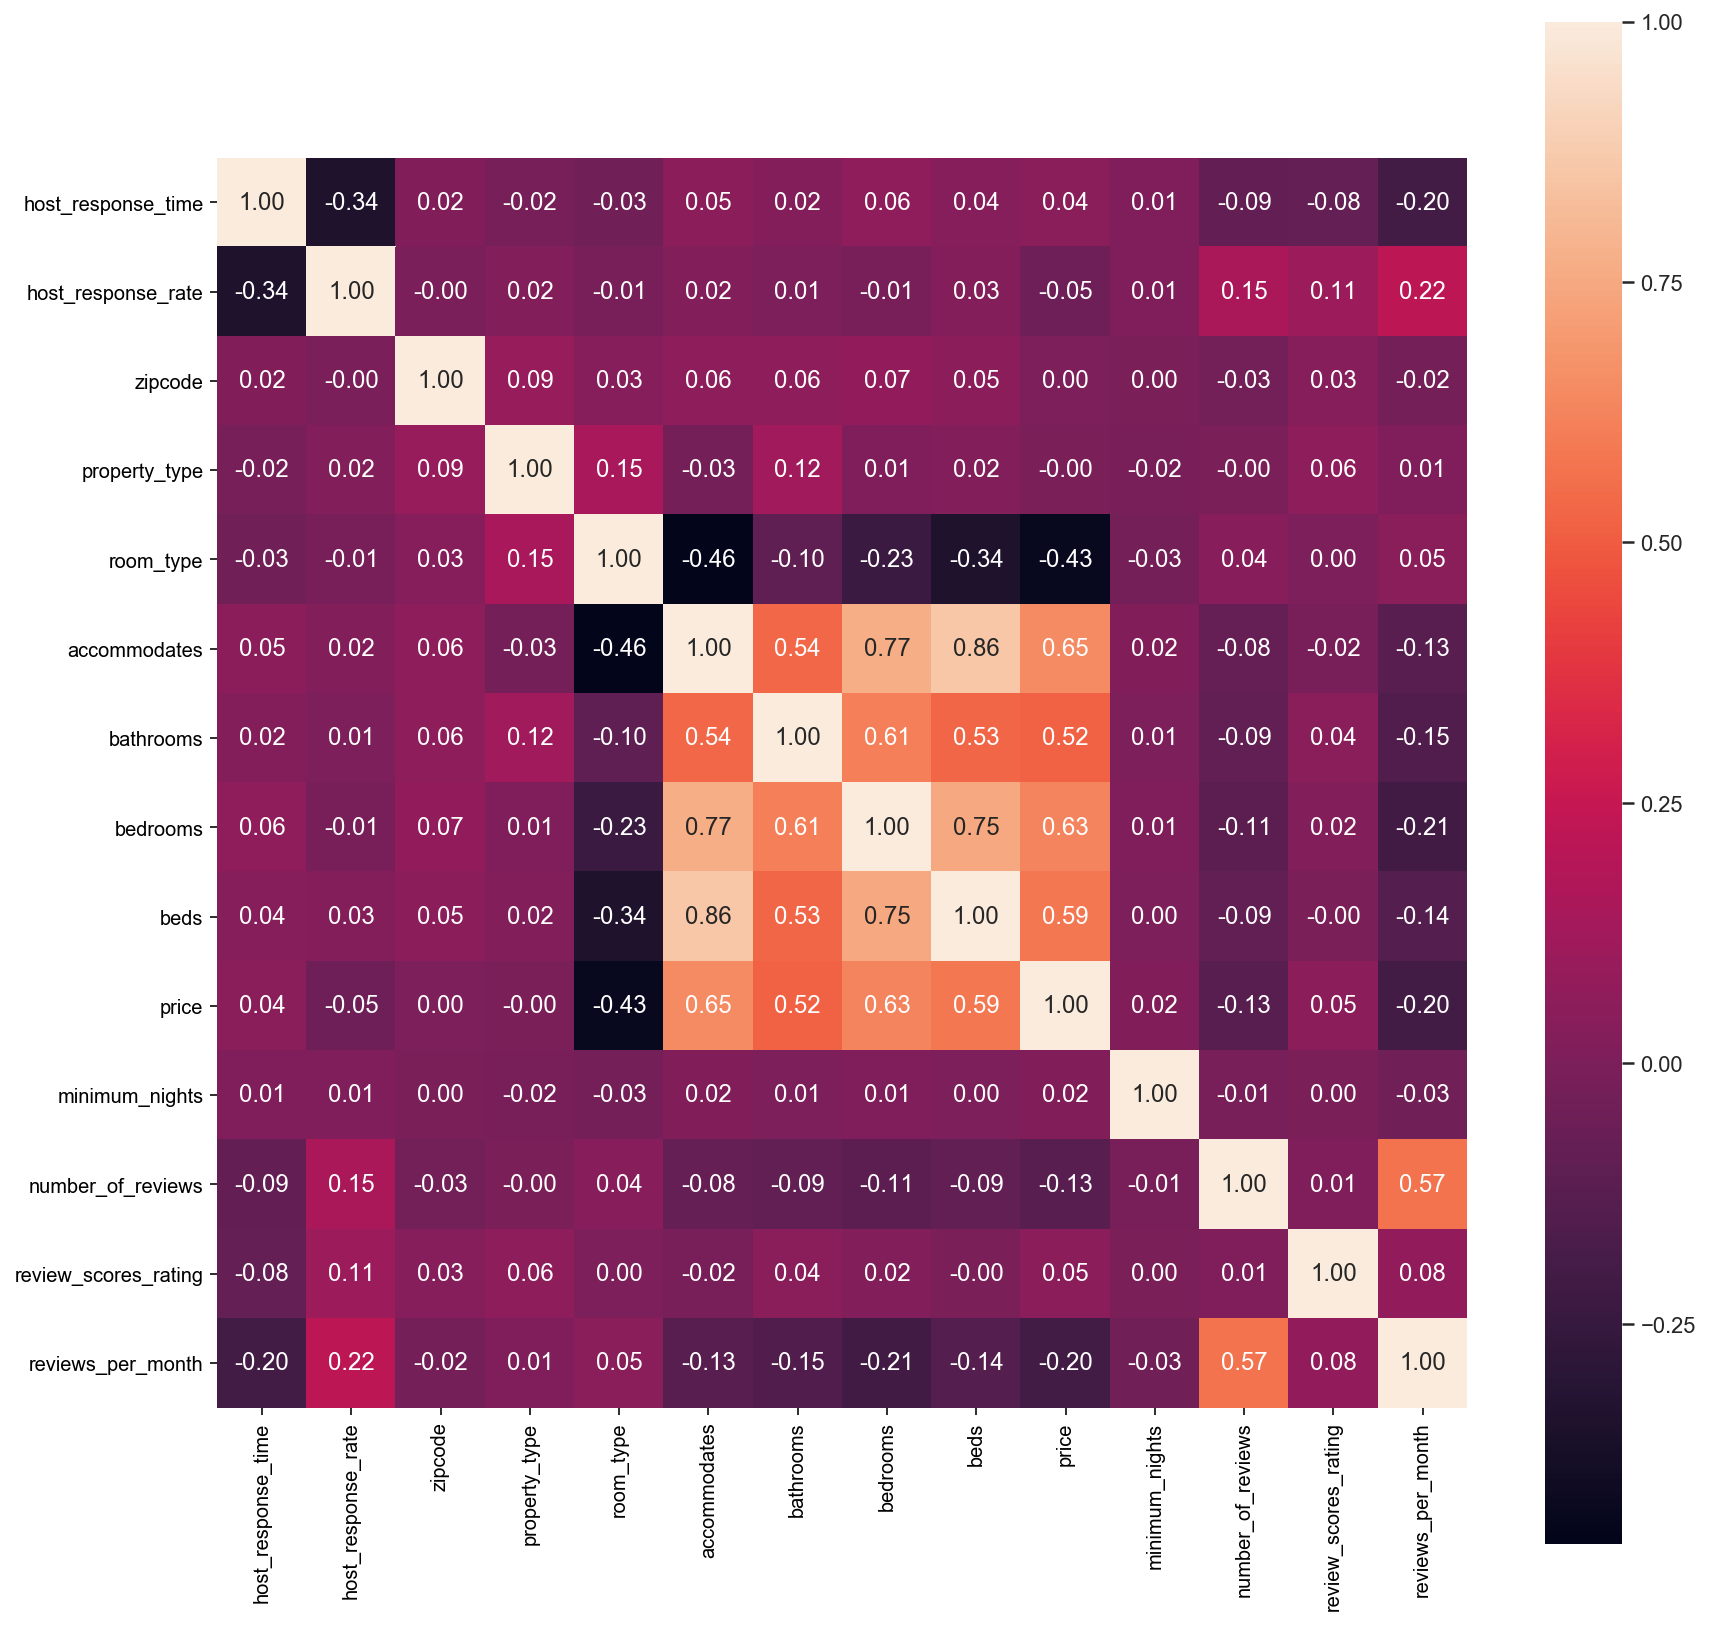

In [61]:
features = ['host_response_time' , 'host_response_rate' , 'zipcode' , 'property_type',
            'room_type' , 'accommodates' , 'bathrooms' , 'bedrooms' , 'beds' , 'price' , 
            'minimum_nights' , 'number_of_reviews' , 'review_scores_rating' , 'reviews_per_month']

pcorr = np.corrcoef(new_listings[features].values.T)
fig, ax = plt.subplots(figsize=(14,14))
sns.set(font_scale=1)
heatmap = sns.heatmap(pcorr, cbar = True, annot=True, square = True, fmt = '.2f',yticklabels = features, xticklabels = features)

### From the model above, we can determine that the following features have the most influence on price, based on Airbnb Seattle dataset
1. Accommodates
2. Bedrooms
3. Beds
4. Bathrooms

### Question 2 - How are Airbnb prices distributed across top 3 features?

#### 2.1 To look at the correlation of price against Accommodates, Let's look at a scatter plot for price vs accommodate

Text(0.5, 1.0, 'Accommodates vs price')

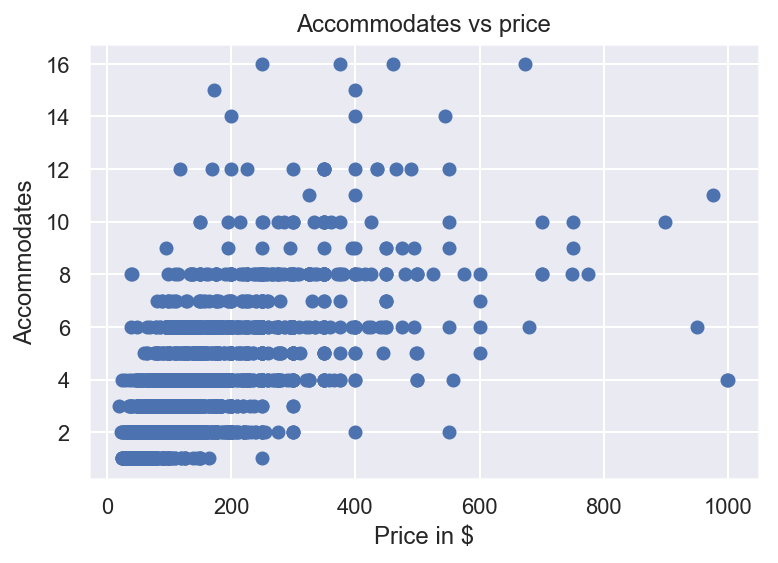

In [62]:
plt.scatter(new_listings['price'],new_listings['accommodates'])
plt.ylabel('Accommodates')
plt.xlabel('Price in $')
plt.title('Accommodates vs price')

#### From the above plot, it is clear that the price increases based on the Number of people a property can accommodate.

#### 2.2 To look at the correlation of price against Bedrooms, Let's look at a scatter plot for price vs bedrooms

Text(0.5, 1.0, 'Number of Bedrooms vs price')

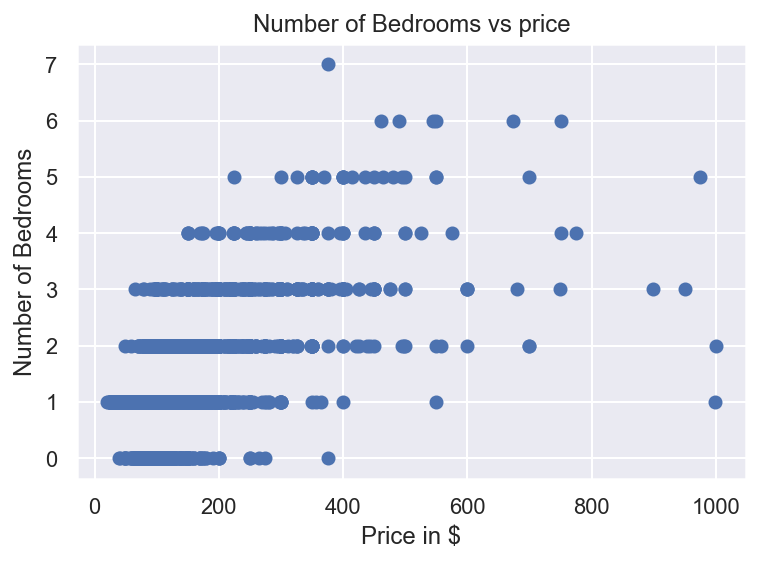

In [63]:
plt.scatter(new_listings['price'],new_listings['bedrooms'])
plt.ylabel('Number of Bedrooms')
plt.xlabel('Price in $')
plt.title('Number of Bedrooms vs price')

#### From the above plot, it is clear that the price increases based on the Number of bedrooms a property contains. Also most of the properties in Seattle seems to offer upto 3 bedrooms and number of data points above that is very little

#### 2.3 To look at the correlation of price against Number of Beds, Let's look at a scatter plot for price vs beds

Text(0.5, 1.0, 'Number of Beds vs price')

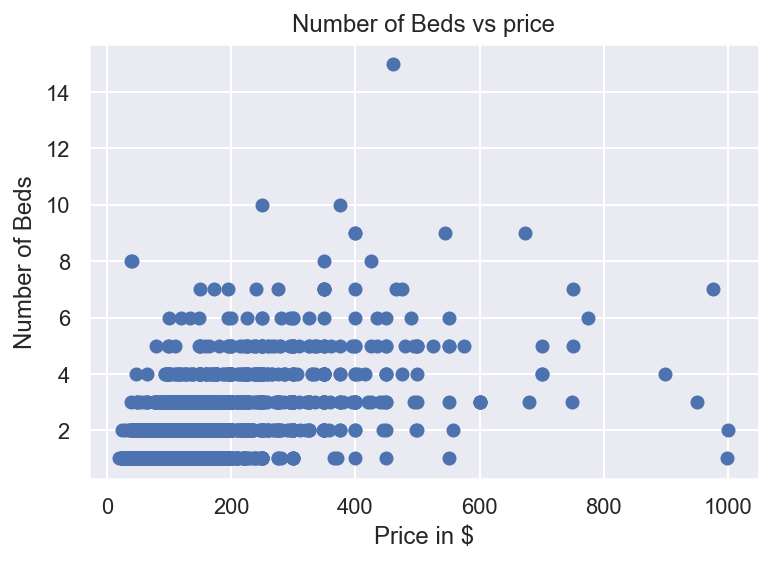

In [64]:
plt.scatter(new_listings['price'],new_listings['beds'])
plt.ylabel('Number of Beds')
plt.xlabel('Price in $')
plt.title('Number of Beds vs price')

#### From the above plot, it is clear that the price increases based on the Number of beds a property offers. Also most of the properties in Seattle seems to offer upto 6 beds and number of data points above that is very little

### Question 3 - What are the most expensive zipcodes in Seattle?

Now to test our model, lets look the correlation of price agains another feature - Zipcode

Text(0.5, 1.0, 'Zipcode vs price')

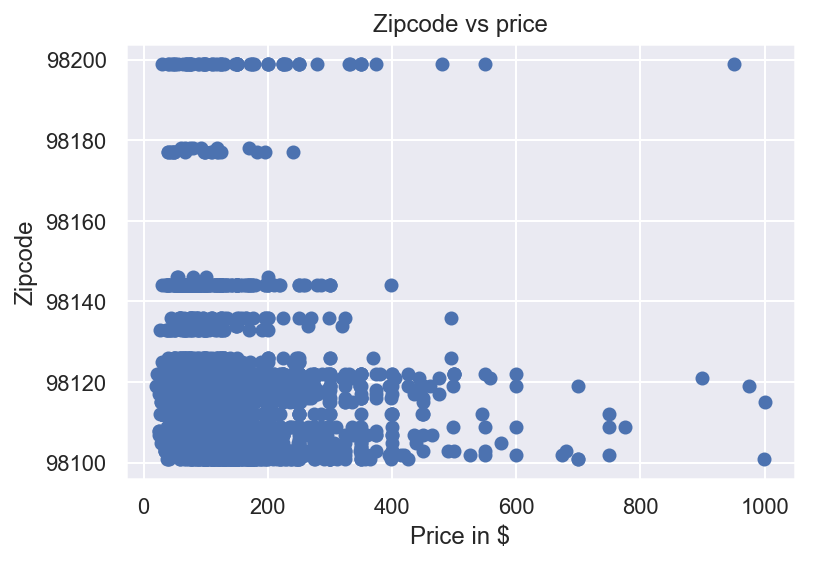

In [65]:
plt.scatter(new_listings['price'],new_listings['zipcode'])
plt.ylabel('Zipcode')
plt.xlabel('Price in $')
plt.title('Zipcode vs price')

#### From the above plot, it is clear that the price is not influenced by the zipcode of a property.
#### Most of Airbnb properies in Seattle seems to be priced below 400 USD irrespective of their zipcode

## Conclusion

The 3 features that have the highest correlation with price are:

1 - Accomodates

2- Bedrooms

3 - Beds

Zipcodes or the location of the property has no influence on the price. Most of the properties in Seattle are priced below USD 400.

Other features such as host reponse time or rate and overall reviews of the property also don't have any influence on the price. 